# Multiple Linear Regression

Pada studi kasus analisis regresi linier berganda akan digunakan data dengan tiga variabel independen (X) TotalBsmtSF, LotArea dan MSSubClass, sedangkan variabel dependen (Y) Sale Price, dengan detail variabel seperti berikut :<br>
TotalBsmtSF : Total square feet of basement area <br>
LotArea : Lot size in square feet <br>
MSSubClass : Identifies the type of dwelling involved in the sale <br>

Pada studi kasus kali ini, ingin diketahui sejauh mana pengaruh TotalBsmtSF, LotArea, dan MSSubClas, terhadap Sale Price ? Dan bagaimana hasil prediksinya ?

## Import Libraries and Data

In [43]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [45]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. 
# Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = "gdrive/My Drive/Data Notebook/"

In [46]:
# Load data
house_prices = pd.read_csv(path+ "house_prices.csv", usecols=["LotArea", "TotalBsmtSF", "MSSubClass", "SalePrice"])

# Display 5 data teratas
house_prices.head()

,MSSubClass,LotArea,TotalBsmtSF,SalePrice
0,60,8450,856,208500
1,20,9600,1262,181500
2,60,11250,920,223500
3,70,9550,756,140000
4,60,14260,1145,250000


## Exploratory Data Analysis (EDA) & Data Preprocessing

Analisis data eksplorasi adalah pendekatan untuk merangkum karakteristik dari data

Data processing adalah proses mengonversi data menjadi informasi yang bermanfaat dan dapat digunakan sesuai dengan tujuan analisis

#### Data Type

In [47]:
# Mendapatkan informasi dari data
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   MSSubClass   1460 non-null   int64
 1   LotArea      1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   SalePrice    1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [48]:
# Melakukan analisa deskriptif
house_prices.describe()

,MSSubClass,LotArea,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1057.429452,180921.195890
std,42.300571,9981.264932,438.705324,79442.502883
min,20.000000,1300.000000,0.000000,34900.000000
25%,20.000000,7553.500000,795.750000,129975.000000
50%,50.000000,9478.500000,991.500000,163000.000000
75%,70.000000,11601.500000,1298.250000,214000.000000
max,190.000000,215245.000000,6110.000000,755000.000000


### Missing Value



Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan.

In [49]:
# Check missing value
house_prices.isna().sum()

MSSubClass     0
LotArea        0
TotalBsmtSF    0
SalePrice      0
dtype: int64

### Duplicates data

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak

In [50]:
# Cek duplicate
duplicate = house_prices[house_prices.duplicated()]
duplicate

,MSSubClass,LotArea,TotalBsmtSF,SalePrice
193,160,2522,970,130000


In [51]:
# drop duplicate
house_prices.drop_duplicates(inplace=True)

In [52]:
# Cek ukuran data apakah duplicate sudah terhapus
house_prices.shape

(1459, 4)

### Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

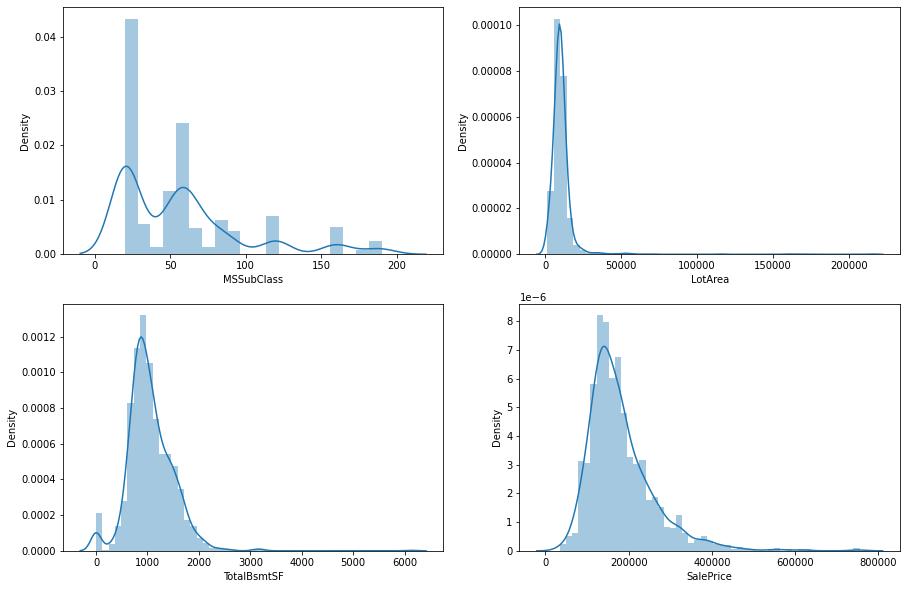

In [53]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(house_prices["MSSubClass"], ax=axes[0, 0])
sns.distplot(house_prices["LotArea"], ax=axes[0, 1])
sns.distplot(house_prices["TotalBsmtSF"], ax=axes[1, 0])
sns.distplot(house_prices["SalePrice"], ax=axes[1, 1])
plt.show()

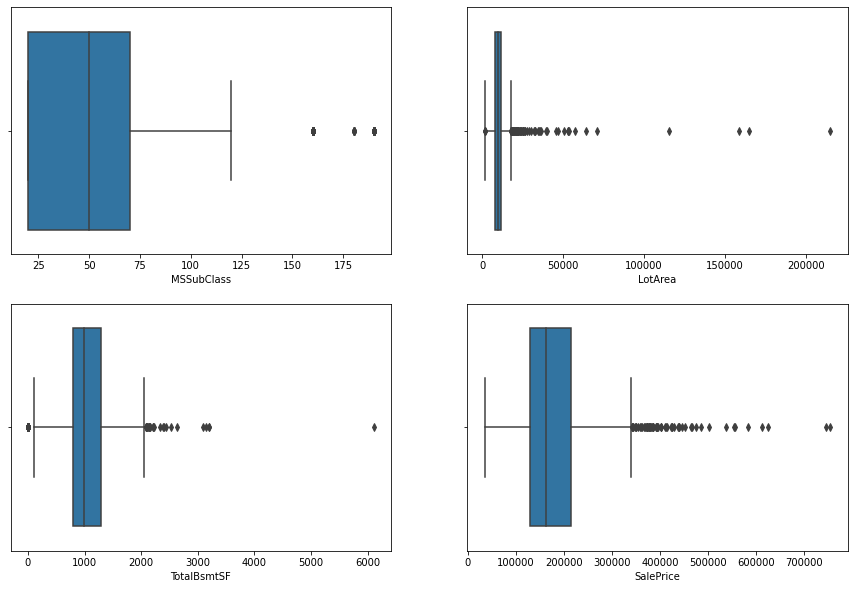

In [54]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(house_prices["MSSubClass"], ax=axes[0, 0])
sns.boxplot(house_prices["LotArea"], ax=axes[0, 1])
sns.boxplot(house_prices["TotalBsmtSF"], ax=axes[1, 0])
sns.boxplot(house_prices["SalePrice"], ax=axes[1, 1])
plt.show()

Syarat distribusi normal pada data hanya diberlakukan pada variabel Y, akan tetapi kita akan melihat sebaran data dari semua varaibel. 

Terlihat dari histogram, bahwa variabel Y Sales Price berdistribusi normal, sedangkan pada variabel X LotArea dan TotalBsmSF membentuk lonceng berdistribusi normal dan variabel X MSSubClass tidak membentuk lonceng (tidak berdistrubis normal) 

Dan dari gambar boxplot, dilihat dari sebaran data pada kuartal 1, kuartal 2 dan kuartal 3, apakah memiliki bentuk yang simetris? 

Dikatakan distribusi normal ketika membentuk pola yang simetris.

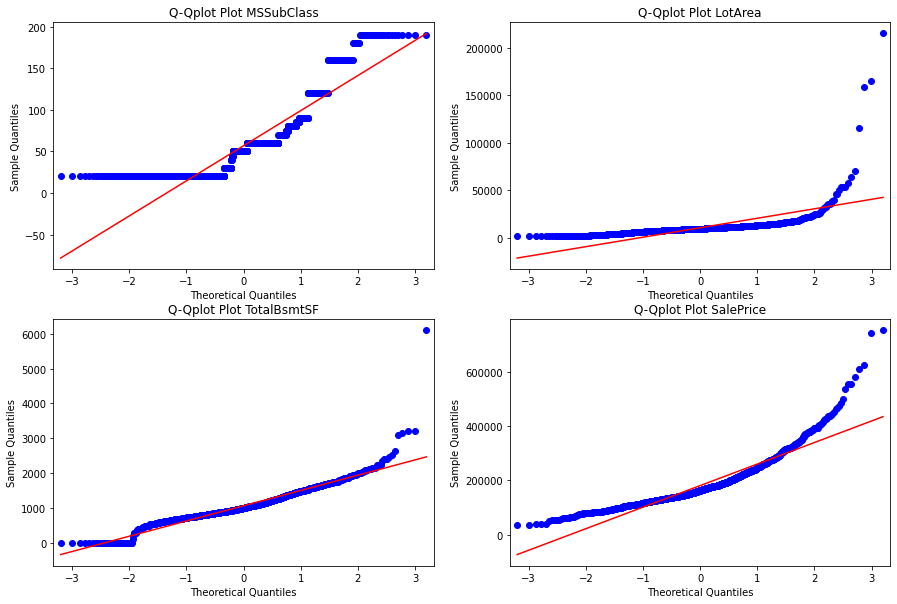

In [55]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(house_prices["MSSubClass"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot MSSubClass')

sm.graphics.qqplot(house_prices["LotArea"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot LotArea')

sm.graphics.qqplot(house_prices["TotalBsmtSF"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot TotalBsmtSF')

sm.graphics.qqplot(house_prices["SalePrice"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot SalePrice')

plt.show()

Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [56]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = house_prices.columns

for i in column:
  stat, p = shapiro(house_prices[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.804, p=0.000
Tolak H0, MSSubClass tidak berdistribusi normal
Statistics=0.351, p=0.000
Tolak H0, LotArea tidak berdistribusi normal
Statistics=0.917, p=0.000
Tolak H0, TotalBsmtSF tidak berdistribusi normal
Statistics=0.870, p=0.000
Tolak H0, SalePrice tidak berdistribusi normal


#### Uji Linearitas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

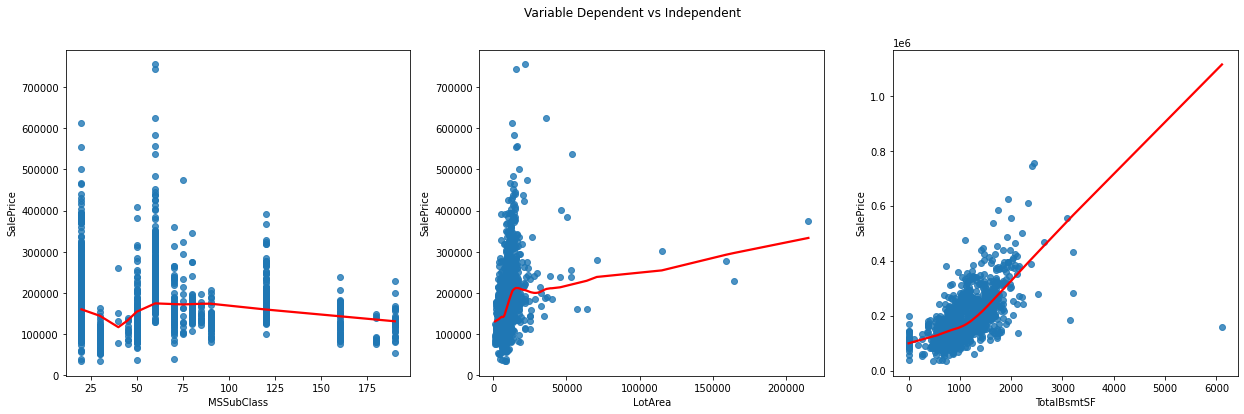

In [57]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=house_prices["MSSubClass"], y=house_prices["SalePrice"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=house_prices["LotArea"], y=house_prices["SalePrice"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=house_prices["TotalBsmtSF"], y=house_prices["SalePrice"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

#### Uji Multikolinearitas

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

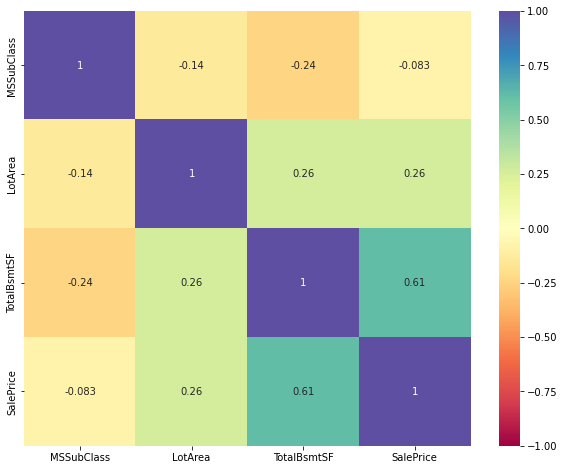

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(house_prices.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [59]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = house_prices.corr()["SalePrice"].sort_values()
korelasi

MSSubClass    -0.083394
LotArea        0.263586
TotalBsmtSF    0.613588
SalePrice      1.000000
Name: SalePrice, dtype: float64

Diperoleh : <BR>
Nilai korelasi antara LotArea dengan TotalBsmtSF (0,26), dengan MSSubClass (-0,14)<br>
Nilai korelasi antara  TotalBsmtSF  dengan MSSubClass (-0,24)

Nilai korelasi yang diperoleh antar variabel bebas relatif kecil, sehingga asumsi terpenuhi

### Scaling
Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [60]:
# Scale data
scaler = StandardScaler()
scaled_house_prices = scaler.fit_transform(house_prices)
scaled_house_prices

array([[ 0.07517373, -0.20766545, -0.45928807,  0.3467638 ],
       [-0.87237242, -0.09242423,  0.4661749 ,  0.00684746],
       [ 0.07517373,  0.07292186, -0.31340228,  0.53560621],
       ...,
       [ 0.31206026, -0.14834127,  0.2154337 ,  1.07695446],
       [-0.87237242, -0.08069969,  0.04675326, -0.48886387],
       [-0.87237242, -0.05865354,  0.4524981 , -0.42119534]])

In [61]:
# Membuat dataframe dari hasil scalling
scaled_house_prices = pd.DataFrame(scaled_house_prices, columns=house_prices.columns)
scaled_house_prices

,MSSubClass,LotArea,TotalBsmtSF,SalePrice
0,0.075174,-0.207665,-0.459288,0.346764
1,-0.872372,-0.092424,0.466175,0.006847
2,0.075174,0.072922,-0.313402,0.535606
3,0.312060,-0.097435,-0.687235,-0.515617
4,0.075174,0.374553,0.199477,0.869228
...,...,...,...,...
1454,0.075174,-0.261077,-0.238180,-0.074984
1455,-0.872372,0.265826,1.104425,0.365648
1456,0.312060,-0.148341,0.215434,1.076954
1457,-0.872372,-0.080700,0.046753,-0.488864


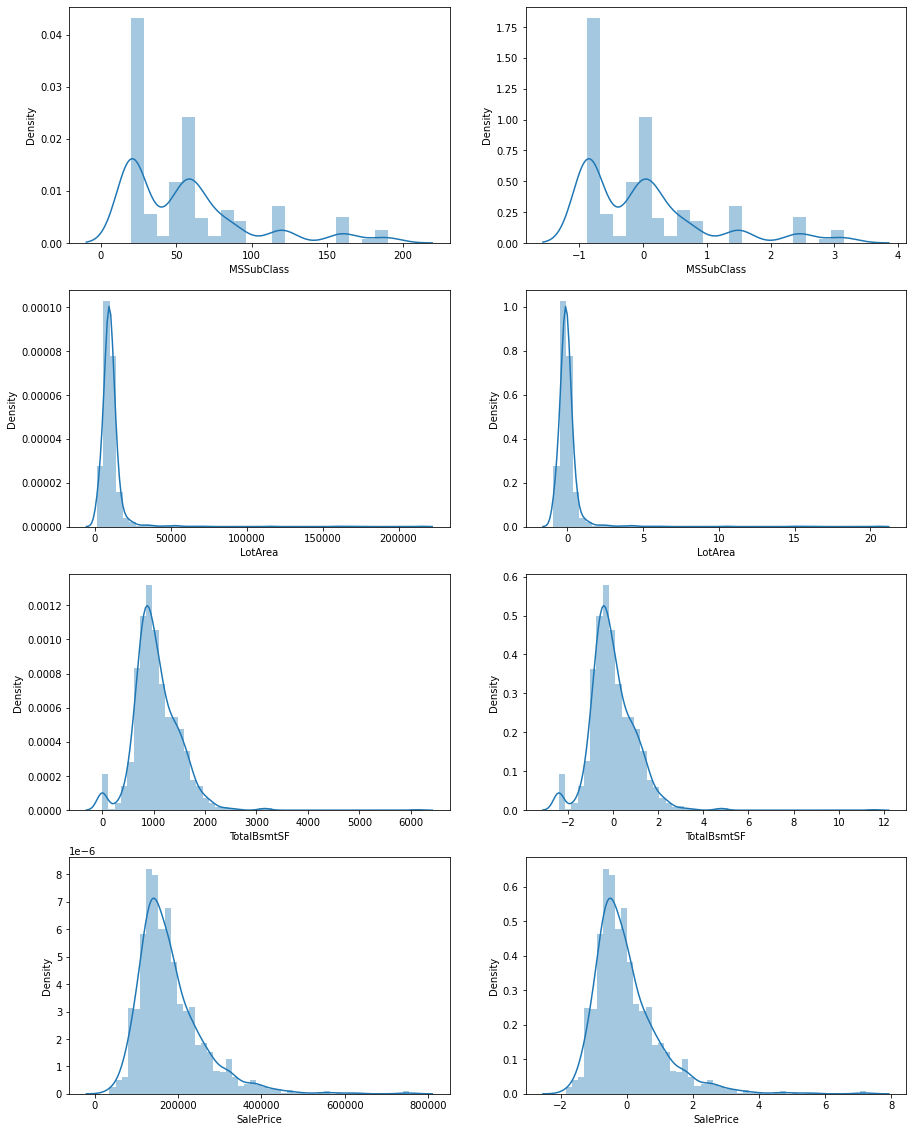

In [62]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.distplot(house_prices["MSSubClass"], ax=axes[0, 0])
sns.distplot(scaled_house_prices["MSSubClass"], ax=axes[0, 1])
sns.distplot(house_prices["LotArea"], ax=axes[1, 0])
sns.distplot(scaled_house_prices["LotArea"], ax=axes[1, 1])
sns.distplot(house_prices["TotalBsmtSF"], ax=axes[2, 0])
sns.distplot(scaled_house_prices["TotalBsmtSF"], ax=axes[2, 1])
sns.distplot(house_prices["SalePrice"], ax=axes[3, 0])
sns.distplot(scaled_house_prices["SalePrice"], ax=axes[3, 1])
plt.show()

## Membangun Model Regresi

### Train Test Split

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [63]:
X = scaled_house_prices.drop("SalePrice", axis=1).values
y = scaled_house_prices["SalePrice"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [64]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  1021
Ukuran X test  438
Ukuran y train  1021
Ukuran y test  438


### Membangun model dengan package Statsmodels

In [65]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [66]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [67]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     262.5
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          3.83e-126
Time:                        05:43:33   Log-Likelihood:                -1131.3
No. Observations:                1021   AIC:                             2271.
Df Residuals:                    1017   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0295      0.023     -1.283      0.2

Dari output diatas, kita dapat melihat nilai - nilai :

Nilai p>|t| = 0,000 ; 0,000 ; 0,000 kurang dari 0,05 artinya, bahwa ketiga variabel independen memberikan pengaruh secara signifikan terhadap variabel dependen, tetapi Nilai p>|t| intercept sebesar 0.2 yang berarti intercept tidak berpengaruh signifikan terhadap model dan garis regresi melewati titik pusat (0,0) oleh karena itu intercept atau konstanta boleh dihilangkan dari model.

Nilai coef-X1 0,0839 artinya besarnya pengaruh variabel independen MSSubClass 0,0839 poin, pada kasus kali ini, jika nilai  MSSubClass bertambah satu, maka nilai sale price bertambah 0,0839

Nilai coef-X2 0,1312 artinya besarnya pengaruh variabel independen LotArea 0,1312 poin, pada kasus kali ini, jika nilai  LotArea bertambah satu, maka nilai sale price bertambah 0,1312

Nilai coef-X3 0,6542 artinya besarnya pengaruh variabel independen Total Bsm tSF 0,6542 poin, pada kasus kali ini, jika nilai  Total Bsm tSF bertambah satu, maka nilai sale price bertambah 0,6542

Nilai R-squared 0,436, artinya variabel dependen sale price dapat dijelaskan oleh ketiga variabel independen sebesar 43,6% , makin besar nilai R-squared akan semakin bagus.

Nilai AIC 2271 dan BIC 2290, nilai ini dapat digunakan ketika dalam analisis regresi menghasilkan beberapa model, dan dijadikan acuan untuk memilih model mana yang terbaik dengan melihat nilai AIC dan BIC yang terkecil.

In [68]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.4364297327887269
adjusted coefficient of determination: 0.43476728362291195
regression coefficients: [-0.02949082  0.08394389  0.13124888  0.65422479]


In [69]:
# membuat list
list_columns = []

for i in house_prices.columns:
  if i != "SalePrice":
    list_columns.append(i)

In [70]:
list_columns

['MSSubClass', 'LotArea', 'TotalBsmtSF']

In [71]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,MSSubClass,LotArea,TotalBsmtSF,actual_price,prediction_price
0,0.075174,0.118016,-0.796649,-0.013296,-0.528878
1,-0.635486,-0.264885,-0.769295,-1.838772,-0.620894
2,0.785833,-0.332928,-2.410510,-1.145091,-1.584237
3,0.785833,0.258410,1.528406,-0.482884,1.070312
4,-0.872372,0.172430,0.972216,-0.074984,0.555958


#### Uji distrubusi residual

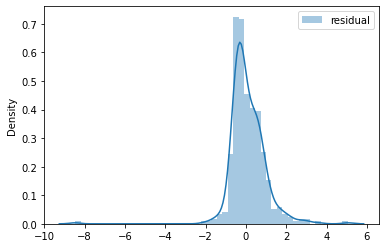

In [72]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [73]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.819, p=0.000
Tolak H0, residual tidak berdistribusi normal


Dari gambar diatas, plot residual yang dihasilkan membentuk lonceng, tetapi pada pengujian normalitas dengan uji Shapiro-Wilk menunjukkan bahwa residual tidak berdistribusi normal. Sehingga dapat disimpulkan residual tidak berdistribusi normal.

In [74]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,MSSubClass,LotArea,TotalBsmtSF,actual_price,prediction_price,residual
0,0.075174,0.118016,-0.796649,-0.013296,-0.528878,0.515583
1,-0.635486,-0.264885,-0.769295,-1.838772,-0.620894,-1.217878
2,0.785833,-0.332928,-2.410510,-1.145091,-1.584237,0.439146
3,0.785833,0.258410,1.528406,-0.482884,1.070312,-1.553196
4,-0.872372,0.172430,0.972216,-0.074984,0.555958,-0.630942


Plot data actual dan prediction <br>
Untuk membandingkan hasil data prediksi dengan data yang asli (actual), dapat dibentuk menjadi plot berikut : 

<function matplotlib.pyplot.show>

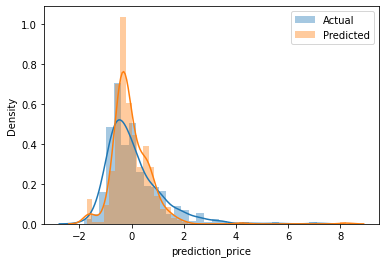

In [75]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

#### Asumsi autokorelasi

Skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.


In [76]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.0994450597456282

#### Uji Homoskedasitas

Uji Homoskedasitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain, dari grafik yang dihasilkan dibawah ini, terlihat data berkumpul dalam satu pusat sehingga dapat dikatakan homoskedasitas terpenuhi


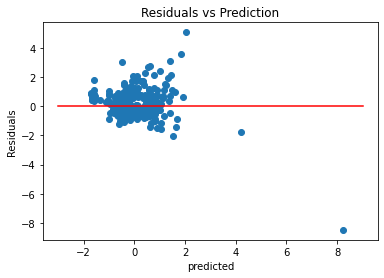

In [77]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot([-3,9],[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

## Evaluation Model

In [78]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : 0.2905394428318363


In [79]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.7822772785532602


##Uji Partial Analisis Regresi
**Uji Parameter T-test** memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [80]:
t_test_const, t_test_X1, t_test_X2, t_test_X3 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)

T-test score const:  -1.2832727194991962
T-test score X1:  3.56962008796602
T-test score X2:  5.189717905003054
T-test score X3:  25.933289747835346


In [81]:

p_value_const, p_value_X1, p_value_X2, p_value_X3 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)

P-value const:  0.19968888703244486
P-value X1:  0.00037420098840835266
P-value X2:  2.542028628478674e-07
P-value X3:  3.166475330725783e-114


Diperoleh dari output diatas, bahwa P-value ketiga variabel kurang dari 0,05 sehingga Hypothesis null ditolak dan dapat disimpulkan, bahwa ketiga variabel independen (X) memberikan pengaruh secara signifikan pada variabel dependen Sale Price (Y).

**Uji kelayakan model F-test** memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [82]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  262.52215211331327
P-value :  3.832851453942854e-126
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null ditolak dan dapat disimpulkan bahwa model regresi dari ketiga variabel independen dan variabel dependen Sale Price (Y) layak digunakan.

# Notes

* Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
* The residual error plot should be normally distributed.
* The mean of residual error should be 0 or close to 0 as much as possible
* Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
* Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
* Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
* Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.